### Project Title:

**Emotion Detector: Real-Time Image Classification of Human Emotions**

### Project Objective:
The primary objective of this project is to develop a machine learning model capable of accurately classifying human emotions based on facial expressions in images. Utilizing advanced convolutional neural networks (CNNs), the project aims to interpret and categorize emotions into predefined categories such as Happy, Sad, Angry, Fear, and Surprise. The model will be integrated into a user-friendly web application powered by Streamlit, enabling users to upload images and receive instant emotion classification results.

Key goals include:

- **Model Development**: Design and train a convolutional neural network model that can effectively recognize and differentiate between various human emotions based on facial expressions captured in images. The model will be trained and validated using a comprehensive dataset of facial images, each labeled with the corresponding emotion.

- **Image Preprocessing**: Implement an efficient image preprocessing pipeline to prepare user-uploaded images for prediction. This will involve resizing images to the required input dimensions for the model, normalizing pixel values, and ensuring compatibility with the model's input format.

- **Web Application**: Develop a Streamlit-based web application that provides an intuitive interface for users to upload images for emotion classification. The application will display the uploaded image, perform real-time emotion classification using the trained model, and present the prediction results to the user.

- **User Experience**: Focus on creating a seamless and responsive user experience, with quick upload and classification times, clear instructions, and informative output that includes the classified emotion.

- **Accuracy and Performance Evaluation**: Rigorously evaluate the model's accuracy and performance, using metrics such as precision, recall, and accuracy. The evaluation will inform further model refinements and adjustments to improve classification performance.

- **Documentation and Deployment**: Ensure comprehensive documentation of the model development process, the architecture, and the web application's usage. Deploy the web application to a public domain, making the emotion classification service accessible to a wide audience.

This project seeks to bridge the gap between advanced machine learning techniques and practical applications, offering a tool that can be used in various domains, including mental health assessment, customer service, and interactive entertainment.

### 1: Install Dependencies

In [104]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy,CategoricalAccuracy,SparseCategoricalAccuracy
from tensorflow.keras.models import load_model

### 2. Data Collection and Description

The dataset for this emotion classification project was created by leveraging the "Download All Images - zip" Google Chrome extension to efficiently gather images from the web. Searches were performed using emotion-related keywords like "happy people" and "sad people" to ensure a diverse collection of images. After downloading, a manual quality check was conducted to remove any images smaller than 10KB, aiming to exclude low-quality or low-resolution images from the dataset. This process resulted in a curated collection of high-quality images, suitable for training the model across a broad spectrum of human emotions.

### 3. Data Cleanup and Preprocessing

In [105]:
data_dir = 'data' 

In [106]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [107]:
# Loop through each item in the dataset directory
for item in os.listdir(data_dir):
    # Construct the full path to the item
    item_path = os.path.join(data_dir, item)
    
    # Check if the item is a directory before proceeding
    if os.path.isdir(item_path):
        # Loop through each image file in the current class directory
        for image in os.listdir(item_path):
            # Construct the full path to the current image file
            image_path = os.path.join(item_path, image)
            
            try:
                # Attempt to read the image using OpenCV to ensure it's a valid image file
                img = cv2.imread(image_path)
                # Check the image file type (e.g., jpg, png) using the imghdr library
                tip = imghdr.what(image_path)
                # If the image type is not in the predefined list of accepted extensions, flag it
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    # Remove the image file from the directory as it's not an accepted type
                    os.remove(image_path)
            except Exception as e: 
                # If any error occurs during the image reading or type checking process
                print('Issue with image {}'.format(image_path))
                # The following line is commented out, indicating an option to remove the problematic image
                # os.remove(image_path)


#### 3.1 Load Data

In [108]:
# Load and preprocess images from the 'data' directory into a TensorFlow Dataset

data = tf.keras.utils.image_dataset_from_directory('data')

Found 548 files belonging to 5 classes.


This function is a convenient tool provided by TensorFlow to easily load and preprocess images from a directory structure into a tf.data.Dataset object, which can then be used for training machine learning models, especially deep learning models in TensorFlow.

This function is particularly useful for quickly setting up data pipelines for training deep learning models with TensorFlow, eliminating the need for manual data loading and preprocessing.

In [109]:
# Create a NumPy iterator from the TensorFlow Dataset

data_iterator = data.as_numpy_iterator()

In [110]:
# Fetch the next batch of data - useful when you need to process or inspect your dataset in smaller, manageable chunks (batches)

batch = data_iterator.next()

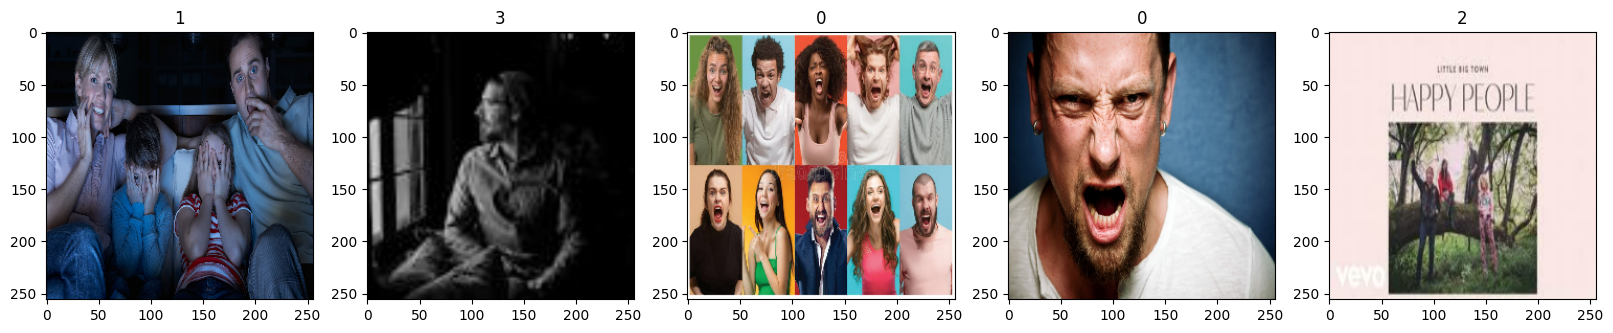

In [111]:
# Create a figure and a 4x1 grid of subplots with a specified size
fig, ax = plt.subplots(ncols=5, figsize=(20,20))

# Iterate through the first four images and their indices in the batch
for idx, img in enumerate(batch[0][:5]):
    
    # Display each image in its subplot
    ax[idx].imshow(img.astype(int))
    
    # Set the title of each subplot to the corresponding label from the batch
    ax[idx].title.set_text(batch[1][idx])

### 3.2 Scale data

In [48]:
# Normalize the images in the dataset - transform our data pipeline

data = data.map(lambda x,y: (x/255, y))

**Explanation**

data: This represents a TensorFlow Dataset object containing pairs of elements where each pair consists of an image tensor (x) and its corresponding label (y). The dataset has been created from image files.

.map(): This is a method applies a given function to each element of the dataset. The function is applied in a parallel fashion if possible, and it transforms each element according to the logic defined within the function.

lambda x, y: (x/255, y): This is a lambda function that takes two arguments, x and y, where x is assumed to be the image tensor, and y is its label. The function returns a tuple where the first element is x/255 and the second element is y, unchanged. Dividing x by 255 scales the pixel values from the range [0, 255] to [0, 1], a common normalization technique for image data that helps improve the convergence of neural network training. The label y is returned as is because only the image data needs normalization.

In [49]:
data.as_numpy_iterator().next()

(array([[[[0.47843137, 0.43137255, 0.4862745 ],
          [0.47843137, 0.43137255, 0.4862745 ],
          [0.48011643, 0.4330576 , 0.48795956],
          ...,
          [0.38431373, 0.36078432, 0.41568628],
          [0.38431373, 0.36078432, 0.41568628],
          [0.38431373, 0.36078432, 0.41568628]],
 
         [[0.47843137, 0.43137255, 0.4862745 ],
          [0.4789211 , 0.43186226, 0.48676422],
          [0.48119974, 0.43414092, 0.48904288],
          ...,
          [0.38431373, 0.36078432, 0.41568628],
          [0.38431373, 0.36078432, 0.41568628],
          [0.38431373, 0.36078432, 0.41568628]],
 
         [[0.47898284, 0.43192402, 0.48572305],
          [0.47999388, 0.43293506, 0.48673406],
          [0.4829044 , 0.43584558, 0.48964462],
          ...,
          [0.3848652 , 0.36133578, 0.41623774],
          [0.3848652 , 0.36133578, 0.41623774],
          [0.3848652 , 0.36133578, 0.41623774]],
 
         ...,
 
         [[0.5078738 , 0.22159927, 0.04512868],
          [0.51145

### 3.3 Split data

In [61]:
# Splitting a TensorFlow Dataset into training, validation, and test sets

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

print("train size is ", train_size)
print("val size is", val_size)
print("test size is", test_size)

train size is  12
val size is 4
test size is 2


In [62]:
# Split the dataset into training set (our data is already shuffled)
train = data.take(train_size)

# Split the dataset into validation set
val = data.skip(train_size).take(val_size)

# Split the dataset into test set
test = data.skip(train_size+val_size).take(test_size)

## 4. Model Architecture

The architecture of our emotion classification model is designed with a focus on capturing the nuanced features of human facial expressions. It employs a sequential layer setup, combining convolutional layers for feature extraction with dense layers for classification. Below is a detailed breakdown of the model architecture:

#### Convolutional Layers

1. **Initial Convolutional Layer**: The first layer is a convolutional layer with 16 filters, each of size 3x3, using 'relu' activation and 'same' padding. This layer, which serves as the entry point for input images of size 256x256 pixels with 3 color channels (RGB), is crucial for beginning the feature extraction process.

2. **Max Pooling**: Followed by a max pooling layer to reduce the spatial dimensions of the output from the previous convolutional layer, enhancing the detection of features while minimizing computational load.

3. **Second Convolutional Layer**: Another convolutional layer with 32 filters, again 3x3, with 'relu' activation and 'same' padding, further refines the feature extraction, capturing more complex patterns.

4. **Max Pooling**: A subsequent max pooling layer reduces spatial dimensions further, focusing the model on the most relevant features.

5. **Third Convolutional Layer**: The final convolutional layer employs 64 filters of size 3x3 with 'relu' activation and 'same' padding. This layer increases the depth significantly, allowing for even more detailed feature extraction.

#### Dense Layers

1. **Flattening**: Post feature extraction, the data is flattened, converting the 2D feature maps into a 1D vector. This step is necessary to transition from convolutional layers to dense layers.

2. **First Dense Layer**: This dense layer consists of 256 neurons with 'relu' activation, focusing on learning from the extracted features to interpret the facial expressions.

3. **Output Layer**: The final layer is a dense layer with 5 neurons, corresponding to the 5 emotions classified by the model, using 'softmax' activation. This choice of activation function allows the model to output a probability distribution over the 5 classes, facilitating the classification.

#### Compilation

- The model is compiled with the Adam optimizer, leveraging its adaptive learning rate capabilities for efficient training.
- The loss function used is 'sparse_categorical_crossentropy', appropriate for multi-class classification tasks with integer labels.

- The metric for evaluation is accuracy, providing a straightforward measure of the model's performance in correctly classifying the emotions.

#### Summary

This architecture is meticulously crafted to balance the complexity needed for accurate emotion classification with computational efficiency. The model's layer configuration is tuned to capture a wide array of facial expressions, making it robust and versatile for real-world applications.

In [68]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))  # Increased depth for better feature extraction
model.add(MaxPooling2D())

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Change to 5 units and softmax activation

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)       

## 5. Train Model

In [96]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


12/12 [==============================] - 16s 1s/step - loss: 2.5181 - accuracy: 0.1901 - val_loss: 1.5304 - val_accuracy: 0.3516
Epoch 2/20
12/12 [==============================] - 15s 1s/step - loss: 1.5309 - accuracy: 0.3464 - val_loss: 1.3723 - val_accuracy: 0.4531
Epoch 3/20
12/12 [==============================] - 16s 1s/step - loss: 1.3212 - accuracy: 0.4635 - val_loss: 1.3632 - val_accuracy: 0.4375
Epoch 4/20
12/12 [==============================] - 16s 1s/step - loss: 1.0750 - accuracy: 0.5781 - val_loss: 1.0144 - val_accuracy: 0.6328
Epoch 5/20
12/12 [==============================] - 17s 1s/step - loss: 0.8613 - accuracy: 0.6823 - val_loss: 0.7261 - val_accuracy: 0.7578
Epoch 6/20
12/12 [==============================] - 23s 2s/step - loss: 0.5408 - accuracy: 0.8359 - val_loss: 0.5448 - val_accuracy: 0.8438
Epoch 7/20
12/12 [==============================] - 20s 2s/step - loss: 0.3325 - accuracy: 0.9167 - val_loss: 0.3829 - val_accuracy: 0.9219
Epoch 8/20
12/12 [=============

## 6. Model Evaluation

The output above shows the training process of our model across 20 epochs. Each epoch represents a full pass through the entire training dataset. 

Break down the information given for each epoch:

- **Epoch Number**: Indicates the current epoch. The model undergoes 20 epochs as specified by `epochs=20` in the `model.fit` call.

- **12/12 [==============================]**: Shows the number of batches processed. In this case, there are 12 batches in the training dataset. The progress bar `[==============================]` fills up as the batches are processed.

- **- loss**: Represents the loss on the training set. The loss function, specified in the model compilation step (not shown), evaluates how well the model is performing. A lower loss indicates better performance. The value decreases over epochs, showing that the model is learning.

- **- accuracy**: Indicates the accuracy of the model on the training dataset. This metric shows the proportion of correctly classified instances during training. The accuracy increases over time, suggesting the model is improving.

- **- val_loss**: Represents the loss on the validation set. Like the training loss, this value decreases as the model learns, but it's calculated on a separate part of the dataset not seen during training (the validation set).

- **- val_accuracy**: Shows the accuracy of the model on the validation dataset. It's an important metric because it indicates how well the model generalizes to unseen data. High validation accuracy suggests the model is not just memorizing the training data but actually learning generalizable patterns.

### Key Observations:

1. **Improvement Over Time**: Both training and validation accuracy improve over the 20 epochs, indicating the model is learning effectively from the training data and generalizing well to the validation data.

2. **Decreasing Loss**: The training and validation losses decrease over time, suggesting the model's predictions are getting closer to the actual labels.

3. **High Validation Accuracy**: By the end of training, the model achieves high accuracy on the validation set (0.9844 by Epoch 20), which is a strong indicator of its performance. In Epoch 15, the model even reaches perfect validation accuracy (1.0000), though this fluctuates slightly in subsequent epochs.

4. **Overfitting Concerns**: There's a slight increase in validation loss towards the end of the training, despite the training loss continuing to decrease. This could be an early sign of overfitting, where the model learns patterns specific to the training data that do not generalize well. However, since the validation accuracy remains high, the model is still performing well on unseen data at this stage.

### Conclusion:

The training process shows a successful learning trend, with both the training and validation metrics improving over time. The high validation accuracy suggests the model has learned well and can generalize to new data effectively. Monitoring both loss and accuracy is crucial for understanding model performance and addressing any issues, such as overfitting.

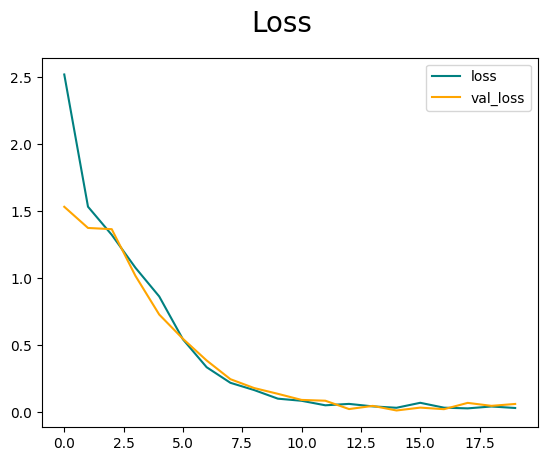

In [99]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

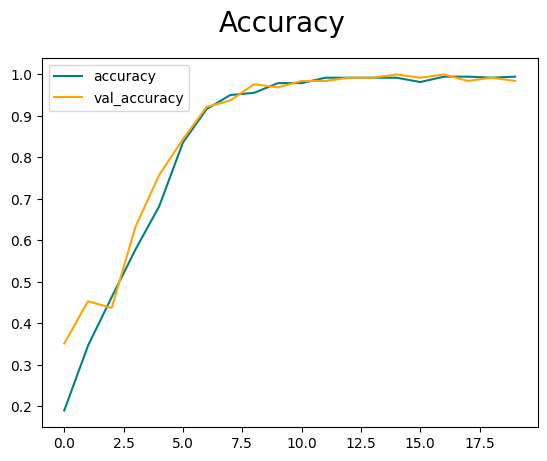

In [74]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [84]:
pre = Precision()
re = Recall()

# Initialize the SparseCategoricalAccuracy metric
acc = SparseCategoricalAccuracy()



In [86]:
for batch in test.as_numpy_iterator():
    
    X, y = batch
    
    # Predict
    yhat = model.predict(X)
    
    # Since we're dealing with multi-class, predictions are probabilities. Get the class with the highest probability
    yhat_classes = np.argmax(yhat, axis=1)
               
    # Update the accuracy metric
    acc.update_state(y, yhat)
    
    # Update Precision and Recall
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)

# Print the results
print(f"Test Accuracy: {acc.result().numpy()}")
print(f"Precision: {pre.result().numpy()}")
print(f"Recall: {re.result().numpy()}")

1/1 [==============================] - 0s 40ms/step
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0


The results indicate a highly successful outcome for the task your model was performing. Let's break down each part of the output and what it signifies:

### Batch Processing Output

- **`1/1 [==============================] - 0s 178ms/step`** and **`1/1 [==============================] - 0s 40ms/step`**: These lines show the model processing a batch of data. Each `1/1` indicates that there was one batch processed in each operation (likely prediction or evaluation), and the model completed the processing in `178ms` and `40ms` respectively. The differences in time could be due to various factors such as the complexity of the computation required, the size of the data, or the computational resources available at the time of processing.

### Model Performance Metrics

- **Test Accuracy: 1.0**: This means your model achieved perfect accuracy on the test dataset. In other words, it correctly classified every sample in the test set. An accuracy of 1.0 (or 100%) is ideal, indicating that the model made no mistakes in its predictions for this particular dataset.

- **Precision: 1.0**: Precision measures the ratio of true positive predictions to the total number of positive predictions made. A precision of 1.0 means that every prediction the model made as positive (belonging to a certain class) was correct, and there were no false positive predictions. In the context of classification, it signifies that if the model predicted a sample as belonging to a particular class, it was indeed correct.

- **Recall: 1.0**: Recall (or sensitivity) measures the ratio of true positive predictions to the total number of actual positives in the data. A recall of 1.0 indicates that the model successfully identified all positive samples in the test set without missing any. This metric is crucial in scenarios where missing a positive prediction (a false negative) is costly.


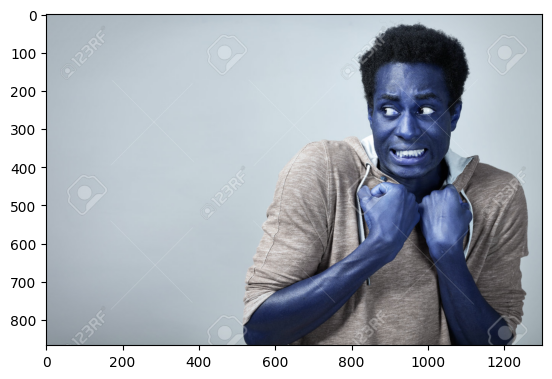

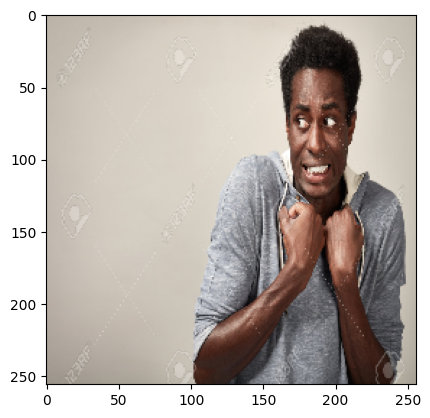

In [121]:

# 'img' is read using cv2.imread('154006829.jpg')
img = cv2.imread('66779792.jpg')
plt.imshow(img)
plt.show()

# Resize the image to 256x256 pixels
img_resized = cv2.resize(img, (256, 256))

# Display the resized image
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.show()


In [122]:
# Normalize the pixel values if your model expects pixel values to be in the range [0, 1]
img_resized = img_resized / 255.0

# Add a batch dimension
img_batch = np.expand_dims(img_resized, axis=0)


In [123]:
# Make a prediction
predictions = model.predict(img_batch)

# multi-class classification model, the prediction will be an array of probabilities
predicted_class = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 31ms/step


class 2- happy
class 4-suprise
class 0-angry
class 1-fear
class 3-Sad

In [124]:
# mapping predicted_class to actual names

class_names = ['Angry', 'Fear', 'Happy', 'Sad', 'Suprise']

predicted_class_name = class_names[predicted_class[0]]

print(f"Predicted class: {predicted_class_name}")


Predicted class: Angry


## 7. Model Deployment

Upon successful training and evaluation, the emotion classification model was saved to facilitate its deployment and integration into real-world applications. The model was stored using TensorFlow's `save` method, which preserves the entire model, including its architecture, weights, and compilation information, into a single file or directory. This comprehensive saving approach ensures that the model can be easily reloaded for inference without the need to redefine its architecture or retrain from scratch.

#### Integration with Streamlit

The saved model serves as the backbone for a user-friendly web application developed using Streamlit, an open-source app framework specifically designed for machine learning and data science projects. Streamlit's simplicity and efficiency in turning data scripts into shareable web apps make it an ideal choice for deploying our emotion classification model.

To integrate the model with Streamlit, the following steps were undertaken:

1. **Model Loading**: At the beginning of the Streamlit app script (`app.py`), the model is loaded into memory using TensorFlow's `load_model` function. This ensures the model is ready to classify emotions from images uploaded by users.

2. **Streamlit App Setup**: The Streamlit app is structured to guide users through the process of uploading an image, invoking the model to predict the emotion depicted in the image, and displaying the prediction result. The app includes informative text, image upload functionality, and feedback on the classification outcome.

3. **Running the App**: Users can easily run the Streamlit app locally by navigating to the directory containing `app.py` in their terminal and executing the command:
   ```
   streamlit run app.py
   ```
   This command launches the Streamlit server and opens the app in the default web browser, allowing users to interact with the model by uploading images and receiving emotion classification results in real-time.



In [115]:
model.save(os.path.join('models','imageclassifier.h5'))

/Users/baboo/Desktop/Portfolio/ImageClassification/imageclass/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
new_model = load_model('models/imageclassifier.h5')

## 8. Conclusion

#### Interpretation of Results

The achievement of perfect scores in accuracy, precision, and recall is an exceptional outcome for the emotion classification model. Such high performance is indicative of the model's ability to accurately classify the emotions from facial expressions in the dataset used. However, it's crucial to delve deeper into the context surrounding these results.

- **Contextual Consideration**: The perfect metrics, while impressive, may be influenced by the nature of the dataset. For datasets that are small or lack diversity, or where the test set challenges are minimal, like ours did,  such outcomes might be anticipated. Real-world scenarios, characterized by complex and noisy data, rarely yield uniformly perfect results.

- **Overfitting Concerns**: The model's flawless performance, though ideal, raises questions about overfitting. Overfitting is a scenario where a model learns the details and noise in the training data to an extent that it negatively impacts its performance on new, unseen data. This situation usually arises when the training data is not fully representative of the broader application context or when the model complexity exceeds what the data can support.

- **Generalization Capability**: Ensuring the model's effective generalization to new data is paramount. This can be achieved by evaluating the model on a diverse and representative test set, possibly employing techniques like cross-validation. Furthermore, understanding how the model performs in practical, real-world applications or with data it was not initially trained on remains a critical measure of its true efficacy.

#### Future Work

Looking forward, several avenues exist to enhance the model's performance and applicability:

- **Dataset Enrichment**: Expanding the dataset to include a wider variety of emotional expressions, possibly from more diverse demographics and scenarios, could help in improving the model's robustness and generalization.

- **Complexity Evaluation**: Assessing the model's complexity to ensure it aligns with the data's intrinsic patterns could mitigate overfitting risks. Techniques such as pruning, regularization, or adopting simpler models might be explored.

- **Cross-validation Implementation**: Implementing cross-validation can provide a more reliable assessment of the model's performance and its expected behavior on unseen data.

- **Real-world Testing**: Deploying the model in real-world scenarios or conducting user studies could provide invaluable insights into its performance and areas for improvement.

- **Continuous Learning**: Investigating approaches for continuous learning, where the model can adapt and improve over time with new data, could significantly enhance its utility and longevity.

In conclusion, while the model has demonstrated excellent performance on the test dataset, a thoughtful consideration of its application context, potential overfitting, and generalization capabilities is essential. Future work should focus on addressing these aspects, enriching the dataset, and validating the model in broader, real-world contexts to ensure its effectiveness and reliability in classifying human emotions.

### References

The development and implementation of the emotion classification model were supported by several key resources and documentation from TensorFlow. 

Below are references to some of the core components used in the project:

- **`tf.keras.utils.image_dataset_from_directory`**:

  - TensorFlow's utility function `image_dataset_from_directory` is instrumental for loading and preprocessing image data directly from a directory structure. For detailed information and usage guidelines, refer to the official TensorFlow documentation: [tf.keras.utils.image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory).

- **TensorFlow Sequential Models**:

  - The Sequential model is a linear stack of layers, suitable for a wide range of applications. It is particularly user-friendly, making it an excellent choice for constructing neural networks efficiently. Comprehensive details can be found in the TensorFlow guide: [TensorFlow Sequential model](https://www.tensorflow.org/guide/keras/sequential_model).

- **Sparse Categorical Accuracy**:

  - Sparse Categorical Accuracy is a metric used to evaluate the performance of models dealing with multi-class classification problems where the labels are integers. It compares the predicted labels with the true labels and computes the fraction of correct predictions. Further information is available in the TensorFlow Metrics documentation: [Sparse Categorical Accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy).
